#LIDC Transfer Learning Model: ERM and gDRO Comparisons

Thomas Zeng 7/8/2022

In this notebook, we do data analysis to compare results on the ERM and gDRO model. Both models had exactly the same hyperparameters except for loss function and were trained 50 times.

##Notebook Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

##Get Dataframes

In [3]:
names = {'entire': 'overall', 
         'marked_benign':'spiculated benign', 
         'unmarked_benign':'unspiculated benign', 
         'marked_malignant':'spiculated malignant',
         'unmarked_malignant':'unspiculated malignant'}

In [4]:
df_erm = pd.read_csv('../data/cnn_erm_accuracies.csv', index_col=0)
df_erm.rename(columns=names, inplace=True)
df_erm.head()

,overall,spiculated benign,unspiculated benign,spiculated malignant,unspiculated malignant
0,0.849180,0.736842,0.913669,0.876404,0.689655
1,0.822951,0.588235,0.827338,0.868132,0.810345
2,0.773770,0.793103,0.772414,0.835616,0.689655
3,0.845902,0.764706,0.836735,0.912500,0.803279
4,0.868852,0.842105,0.910345,0.883721,0.745455


In [5]:
df_gdro = pd.read_csv('../data/cnn_gdro_accuracies.csv', index_col=0)
df_gdro.rename(columns=names, inplace=True)
df_gdro.head()

,overall,spiculated benign,unspiculated benign,spiculated malignant,unspiculated malignant
0,0.832787,0.791667,0.872180,0.895349,0.677419
1,0.855738,0.785714,0.892617,0.886076,0.734694
2,0.822951,0.764706,0.876812,0.791667,0.759259
3,0.800000,1.000000,0.813433,0.817204,0.666667
4,0.839344,0.850000,0.867550,0.862069,0.702128


##Data Analysis 

###First we look at the mean overall accuracies and mean subgroup sensitivities

In [6]:
df_erm.mean()

overall                   0.832393
spiculated benign         0.768231
unspiculated benign       0.867646
spiculated malignant      0.865414
unspiculated malignant    0.710276
dtype: float64

In [7]:
df_gdro.mean()

overall                   0.827213
spiculated benign         0.775939
unspiculated benign       0.856396
spiculated malignant      0.861041
unspiculated malignant    0.720941
dtype: float64

###Now We plost histograms

In [8]:
bins = np.arange(0.4,1,0.05)

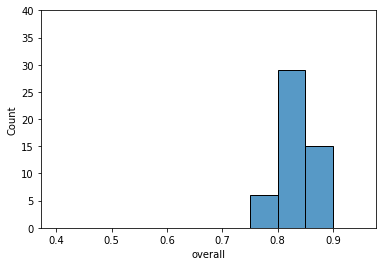

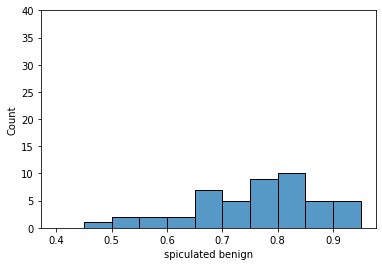

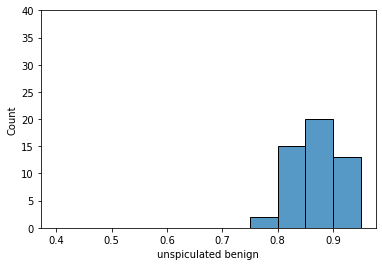

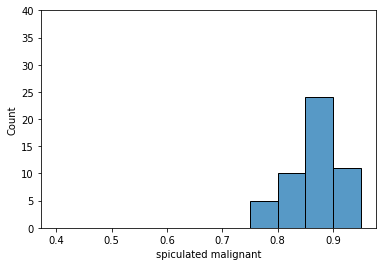

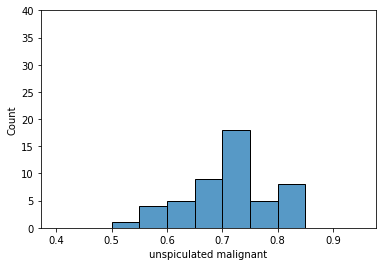

In [9]:
for idx, col in enumerate(df_erm.columns):
    plt.figure(idx)
    plt.ylim(0,40)
    sns.histplot(df_erm[col],bins=bins)

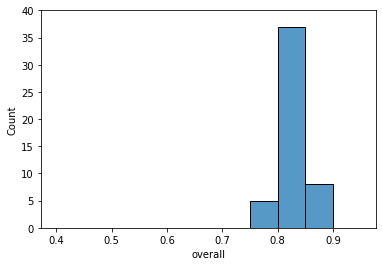

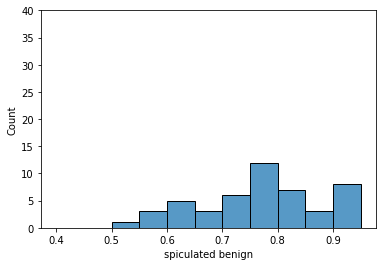

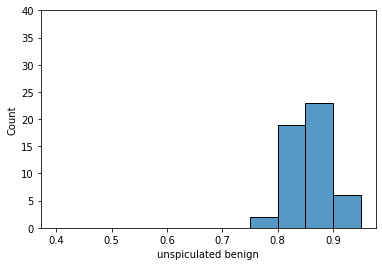

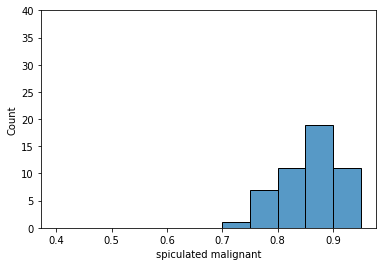

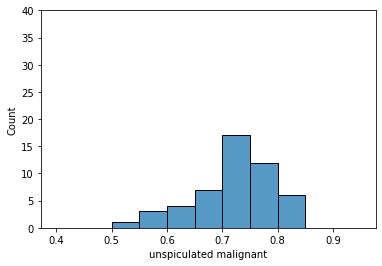

In [10]:
for idx, col in enumerate(df_gdro.columns):
    plt.figure(idx)
    plt.ylim(0,40)
    sns.histplot(df_gdro[col],bins=bins)

###Now We make boxplots

(0.4, 1.01)

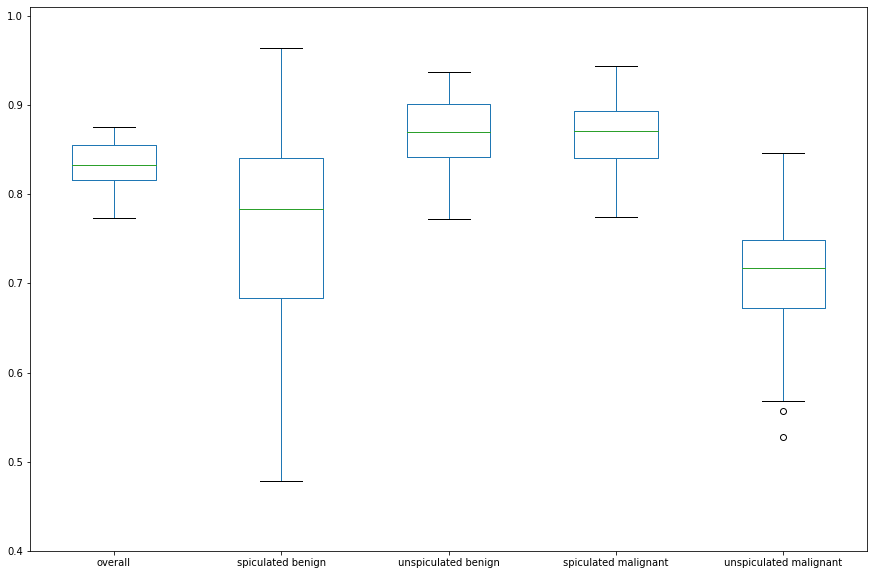

In [11]:
df_erm.boxplot(grid=False,figsize=(15,10)).set_ylim(0.4, 1.01)

(0.4, 1.01)

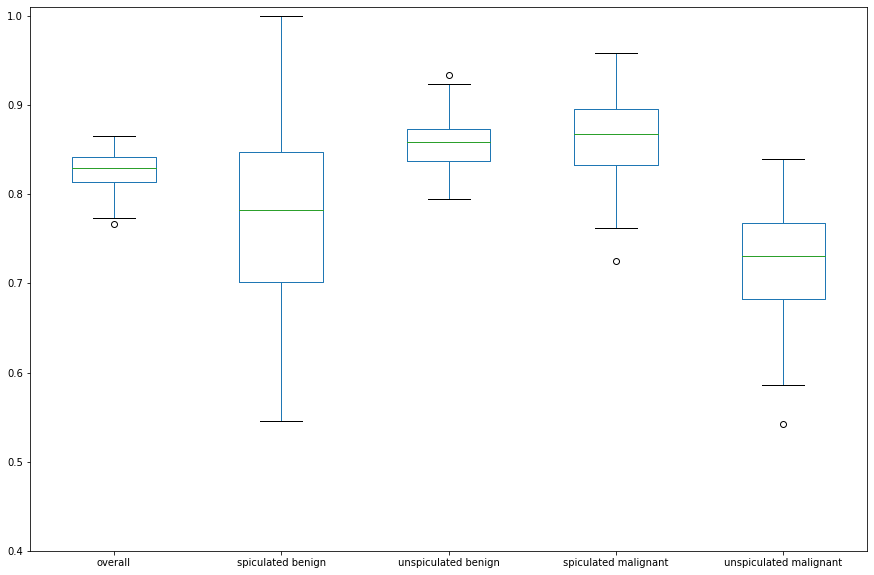

In [12]:
df_gdro.boxplot(grid=False,figsize=(15,10)).set_ylim(0.4, 1.01)

###Now We do T-Testing

In [13]:
ttests = zip(df_erm.columns, ttest_ind(df_erm, df_gdro)[1])
for name, val in ttests:
    print(f'{name:<23} {val:.3}')

overall                 0.302
spiculated benign       0.742
unspiculated benign     0.117
spiculated malignant    0.64
unspiculated malignant  0.46
